In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bpi_fr_algo_credit_scoring.reader import read_yearly_data
from bpi_fr_algo_credit_scoring.data_pipeline import clean_dataset

In [2]:
# Dataset for correlation study
def dataset_for_correlation():
    default_risk_dataset = read_yearly_data(
        path=Path.joinpath(Path(os.getcwd()).parent, "data"), 
        default_year=1
        )
    cleaned_default_risk = clean_dataset(
        default_risk_dataset,
        ratio_na_per_features=0.05,
        nb_na_sample_threshold=0,
        ratio_under_oversampled=0.2
    )
    return cleaned_default_risk

df_corr = dataset_for_correlation()

<Axes: >

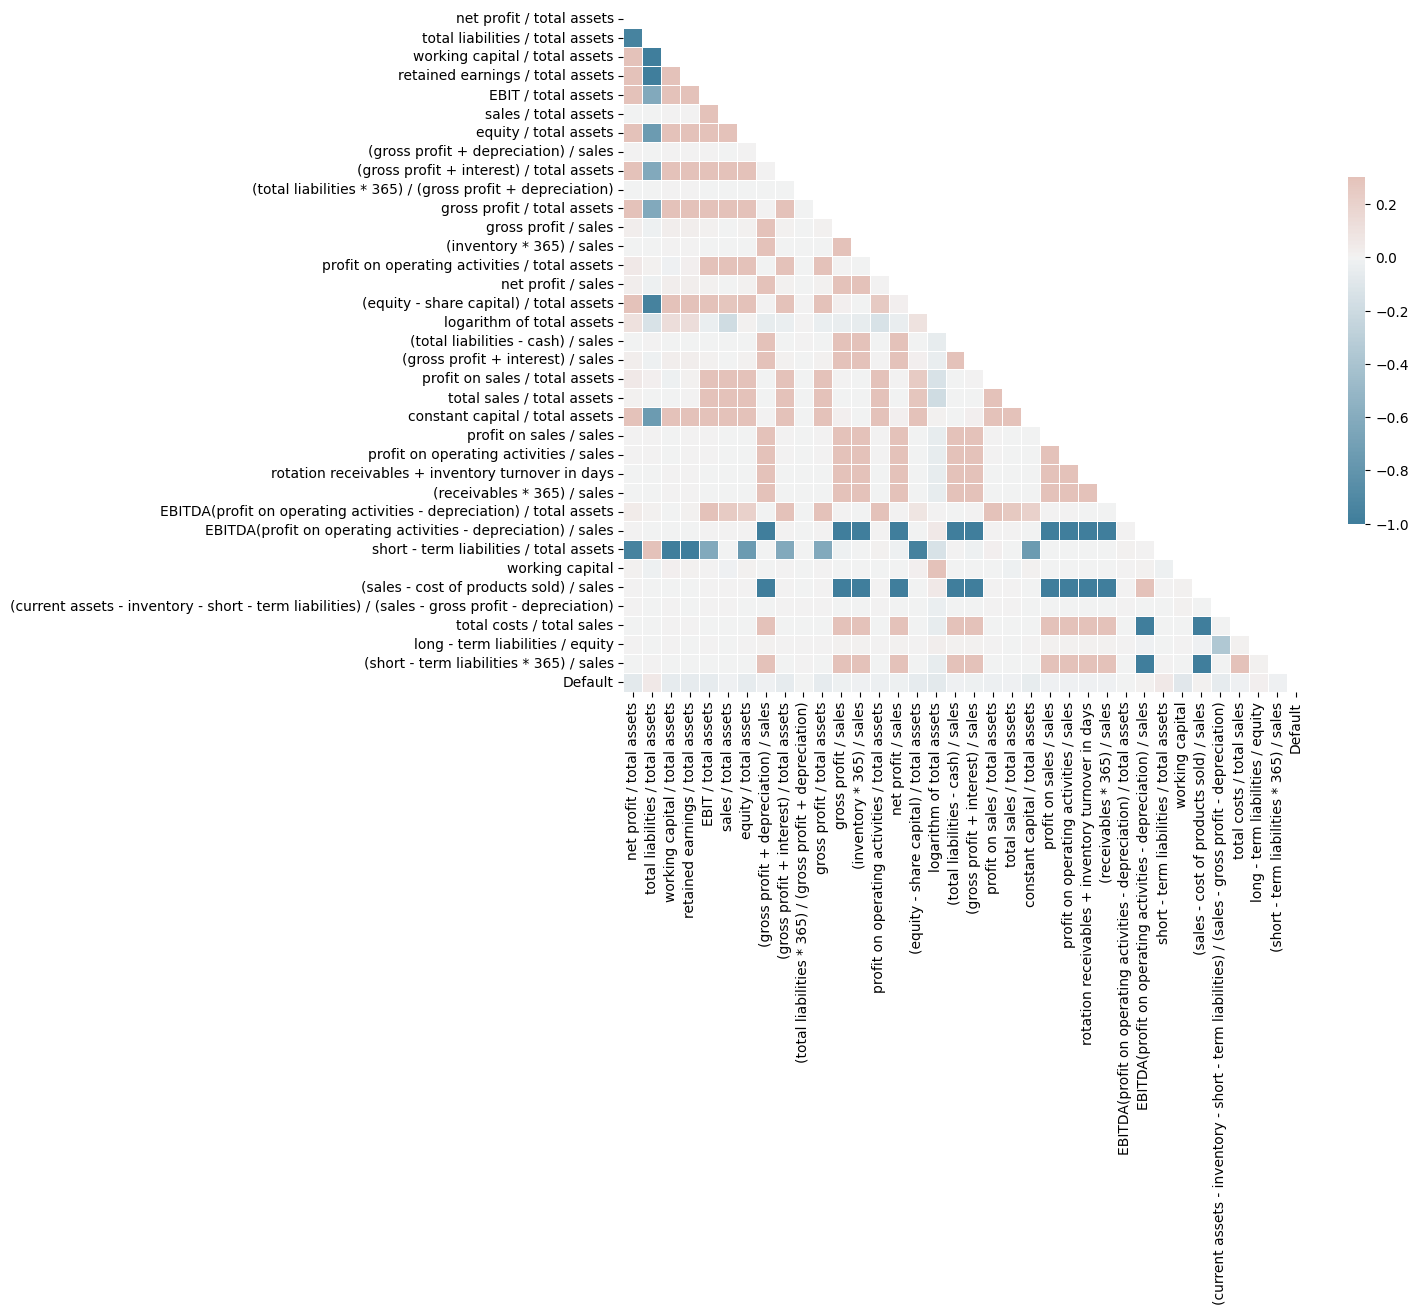

In [3]:
# Correlation study
data_corr = df_corr.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data_corr, dtype=bool))
colormap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, 
            mask=mask, 
            cmap=colormap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})